<a href="https://colab.research.google.com/github/datadigger01/datamining/blob/main/Classification(DT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # to draw graphs
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('/content/drive/MyDrive/데이터마이닝수업/Data/default_credit_card.csv')
df

,Cust_ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_YN
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [4]:
# predicators(feature) & target(label)
features = ['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','BILL_AMT1','BILL_AMT2','BILL_AMT3','PAY_AMT1','PAY_AMT2','PAY_AMT3']
label = ['default_YN']

#df1 = df[label + features]
#df1.info()

In [25]:
from sklearn.model_selection import train_test_split
# Split Data for Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(df[features], df[label], test_size=0.25, random_state=365)
X_train
#y_train
#X_test

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3
6727,220000,1,1,2,29,0,0,0,216096,189566,183838,10110,12000,5852
29219,20000,1,2,3,25,0,0,0,3855,3150,2862,1040,1225,1000
29528,20000,1,2,1,47,0,0,0,14186,14960,16102,1000,1376,3200
1217,340000,2,1,1,30,0,0,0,351828,280067,259651,30076,25118,20085
11889,30000,2,2,2,22,-2,-2,-2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8620,350000,1,2,2,36,0,0,0,230738,232382,234254,9503,9015,7511
13147,360000,2,1,2,29,0,0,0,148582,96639,82386,90044,10090,50006
4897,80000,2,2,1,37,0,0,0,57830,55107,51616,2103,2023,1850
2740,70000,2,2,1,28,0,0,0,44230,44348,28978,1747,1272,1212


In [6]:
from sklearn.tree import DecisionTreeClassifier # to build a classification tree

# Hyperparameter setting
clf_dt = DecisionTreeClassifier(criterion='entropy',max_depth=6, min_samples_leaf=10)
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=10)

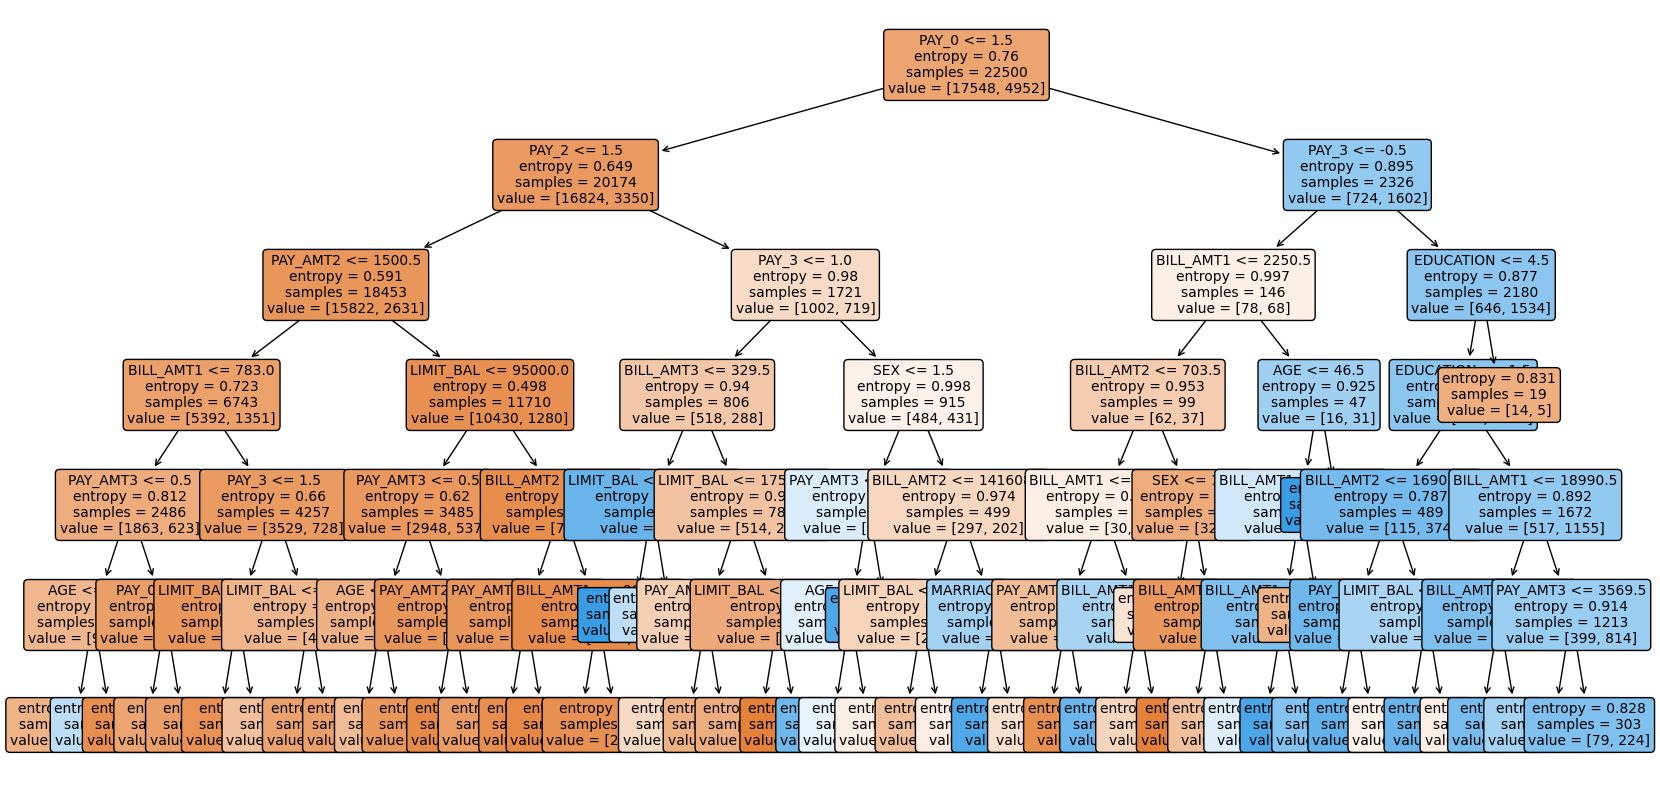

In [7]:
from sklearn.tree import plot_tree # to draw a classification tree

plt.figure(figsize=(20,10))
plot_tree(clf_dt,
          filled=True,
          rounded=True,
          proportion=False,
          #class_names=["default_N","default_Y"],
          fontsize=10,
          feature_names=features)
plt.show()

In [8]:
predicted_value= clf_dt.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix

print(y_test.value_counts())
print(confusion_matrix(y_test, predicted_value, normalize='true'))

default_YN
0             5816
1             1684
dtype: int64
[[0.95013755 0.04986245]
 [0.62885986 0.37114014]]


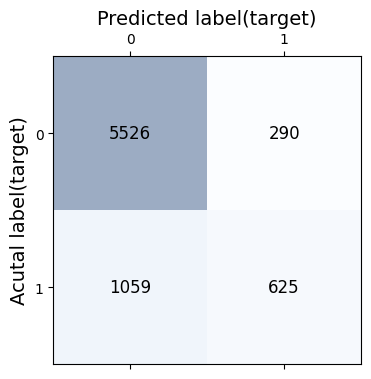

In [20]:
con_m = confusion_matrix(y_test, predicted_value, normalize=None)  # normalize=c('true','pred','all'), None

fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(con_m, cmap=plt.cm.Blues, alpha=0.4)
for i in range(con_m.shape[0]):
    for j in range(con_m.shape[1]):
        ax.text(x=j,y=i,s=np.round(con_m[i,j],3),va='center',ha='center', fontsize=12)
#plt.xlabel('predicted label(target)',fontsize=14)
plt.ylabel('Acutal label(target)', fontsize=14)
plt.title("Predicted label(target)",fontsize=14)
plt.show()